In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from  hmcSampler import HMCSampler

def dU(q):
    return np.sum((y - f(q,x))*(-1.0*df(q,x)), axis=2)

def U(q):
    return np.sum((y - f(q,x))**2,axis=1)/2.0

def f(q,x):
    return np.polynomial.polynomial.polyval(x,q)
 
def df(q,x):
    r = np.transpose(np.asarray([dx]*q.shape[1]),(1,0,2))
    return r


In [22]:
global y
global x
global dx

x = np.linspace(-2.0,2.0,100)
p = np.asarray([2.0,5.0,-1.0])
y = f(p,x) + np.random.randn(len(x))

indicies = np.arange(len(p))
xp = (x*np.ones((len(p),len(x)))).T
dx = np.power(xp,indicies).T

smp = HMCSampler()
smp.U = U
smp.dU = dU
smp.qi = np.asarray([1.5,4.0,0.0])
smp.n_samples = 1000
smp.n_burnin = 1000
smp.steps = 10
smp.epsilon = 0.01

y0 = f(smp.qi,x)

smp.runHMC()

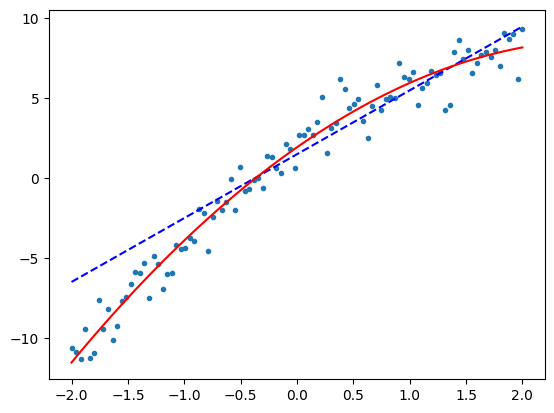

In [23]:
smp.samples = np.reshape(smp.samples,(smp.n_samples*smp.n_walkers,len(smp.qi)))
smp.orbits = np.reshape(smp.orbits,(smp.n_samples*smp.n_walkers,smp.steps,len(smp.qi)))

py = f((np.median(smp.samples,axis=0)),x)
plt.plot(x,y,'.')
plt.plot(x,y0,'b--')
plt.plot(x,py,'r-')
plt.show()


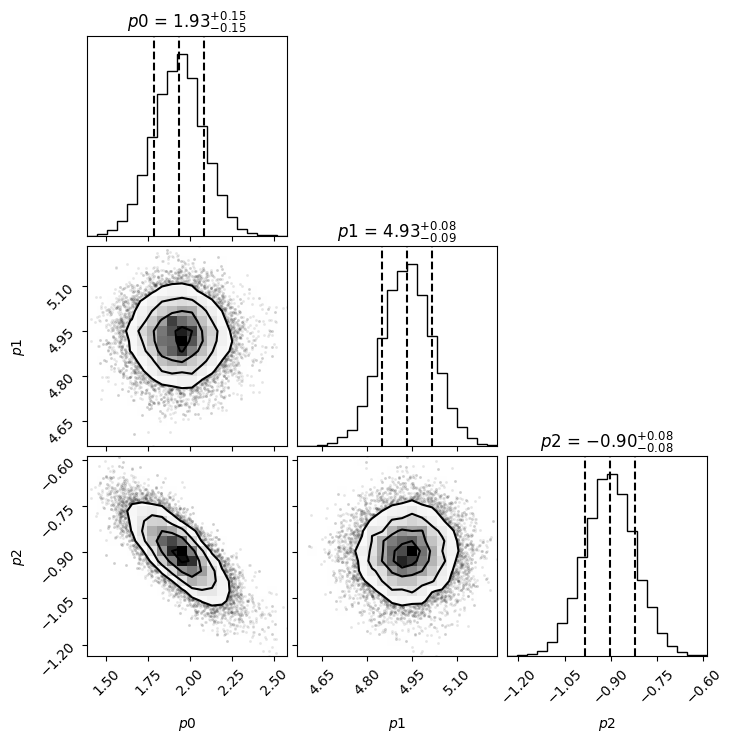

In [24]:
figure = corner.corner(
smp.samples,
labels=[
    r"$p0$",
    r"$p1$",
    r"$p2$",
    r"$p3$"],
quantiles=[0.16, 0.5, 0.84],
show_titles=True,
title_kwargs={"fontsize": 12})

plt.show()

In [27]:
p0 = np.linspace(np.min(smp.samples[:,0]),np.max(smp.samples[:,0]),1000)
p1 = np.linspace(np.min(smp.samples[:,1]),np.max(smp.samples[:,1]),1000)
p2 = np.linspace(np.min(smp.samples[:,2]),np.max(smp.samples[:,2]),1000)

pp = np.flipud(np.asarray(np.meshgrid(p1,p0,p2)))


uu = smp.U(pp.reshape((3,1000000))).reshape((1000,1000))


plt.contour(pp[0,:,:],pp[1,:,:],uu)
plt.plot(smp.samples[:,0],smp.samples[:,1],'k.')
plt.plot(smp.orbits[1:50:2,:,0].T,smp.orbits[1:50:2,:,1].T)
plt.show()

(20000, 10, 2)


array([1.93529513, 1.95530707, 1.97417903, 1.99172228, 2.0077614 ,
       2.02213599, 2.03470231, 2.04533469, 2.05392682, 2.06039276])

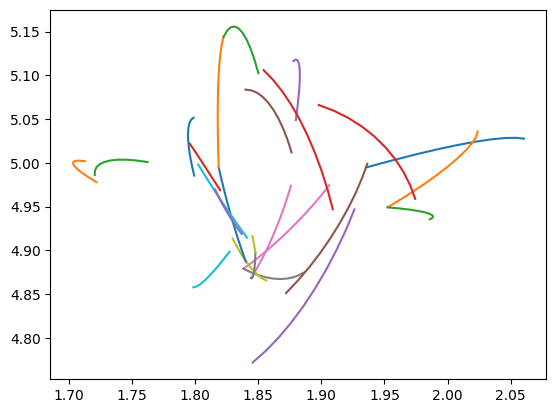

In [21]:
plt.plot(smp.orbits[1:50:2,:,0].T,smp.orbits[1:50:2,:,1].T)

print(smp.orbits.shape)

smp.orbits[1,:,0]